In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

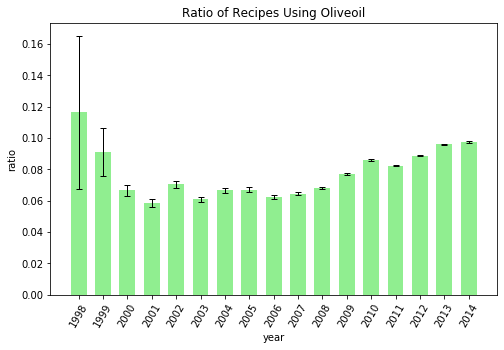

In [14]:
def main():
    """
    メインの処理。mokomichi(),show()の2つの関数を呼び出す。
    """

    col_names = ["ID", "ingredient", "amount"]
    year = []
    for i in range(1998, 2015):
        year.append(i)

    ratio, se = mokomichi(col_names, year)
    show(year, ratio, se)

def mokomichi(col_names, year):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を取得する。
    """

    ratio = []
    se = []
    for i in year:
        df = pd.read_csv(f"ingredient{i}.csv", names=col_names)
        n = len(pd.unique(df['ID']))
        df[["ingredient", "amount"]] = df[["ingredient", "amount"]].fillna("non_data")
        count = 0
        for j in range(len(df)):
            if ("オリーブオイル" in df["ingredient"][j]) or ("おりーぶおいる" in df["ingredient"][j]) or ("オリーブ油" in df["ingredient"][j]):
                count += 1
        p = count / n
        ratio.append(p)
        se.append(np.sqrt(p*(1-p)/n))
    return ratio, se

def show(year, ratio, se):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を視覚化する。
    """

    error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
    fig = plt.figure(figsize=(8.0, 5.0))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(year, ratio, color="lightgreen",tick_label=year, yerr=se, ecolor="black", error_kw=error_bar_set, width=0.65)
    ax.set_xticklabels(year, rotation=60)
    ax.set_title("Ratio of Recipes Using Oliveoil")
    ax.set_xlabel("year")
    ax.set_ylabel("ratio")
    plt.show()

if __name__ == "__main__":
    main()